In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"font.weight":"medium", "font.style":"normal", "font.family":"Verdana", "font.size":14.5})

In [ ]:
dir_name = "../logfiles_consul_1st/csv/"
file_write_list = dir_name+"write-list-%s.csv"
file_list_secrets = dir_name+"list-secrets-%s.csv"
file_write_random_secrets = dir_name+"write-random-secrets-%s.csv"
file_write_secrets = dir_name+"write-secrets-%s.csv"
file_read_secrets = dir_name+"read-secrets-%s.csv"



In [ ]:
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
for i in range(len(run_type)): 
    df_list = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
    df_list = df_list[(df_list['run_time'] == 20)]
    # print(df_list)
    df_tmp = df_list['lat_avg'].skew()
    # print(df_tmp)
    # print( df_list['lat_avg'])
    # based on skewness values we can detect outliers
    print("describing %s" % graph_labels[i])
    print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].quantile(0.10))
    # print(df_list['lat_avg'].quantile(0.90))
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] <217.354, 217.354,df_list['lat_avg'])
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] >801.414, 801.414,df_list['lat_avg'])
    # print(df_list['lat_avg'].unique())
    # print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].skew())


In [ ]:
for i in range(len(run_type)): 
    df_list = pandas.read_csv(run_type[i]%"scone").astype(dtype=float)
    df_list = df_list[(df_list['run_time'] == 20)]
    # print(df_list)
    df_tmp = df_list['lat_avg'].skew()
    # print(df_tmp)
    # print( df_list['lat_avg'])
    # based on skewness values we can detect outliers
    print("describing %s" % graph_labels[i])
    print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].quantile(0.10))
    # print(df_list['lat_avg'].quantile(0.90))
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] <217.354, 217.354,df_list['lat_avg'])
    # df_list["lat_avg"] = np.where(df_list["lat_avg"] >801.414, 801.414,df_list['lat_avg'])
    # print(df_list['lat_avg'].unique())
    # print(df_list['lat_avg'].describe())
    # print(df_list['lat_avg'].skew())

In [ ]:
df_list_columns = pandas.read_csv(file_write_list % "scone").astype(dtype=float)
print(df_list_columns.columns)

In [ ]:
# run_times = [20,30,40,50]
# run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
# graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_type = [file_write_list]
graph_labels = ["Write List "]
run_times = [50]

for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        # print(df_list)
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='50per', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Total Requests', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='50per', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Total Requests', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.show()


In [ ]:
# run_times = [20,30,40,50]
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='90per', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('90Per', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='90per', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('90Per', labelpad=5)
        plt.xlabel('Number Of Connections', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.show()

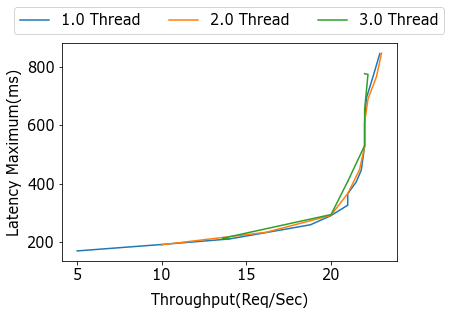

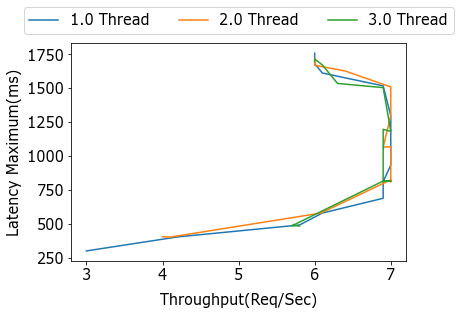

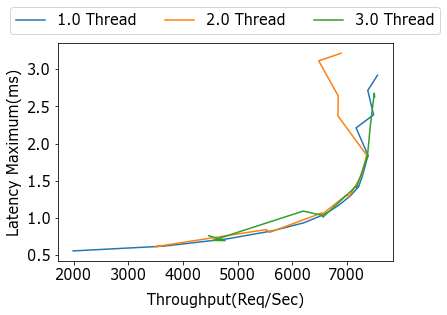

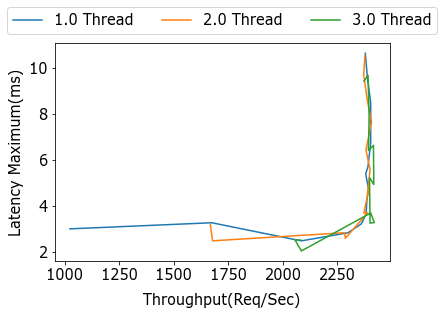

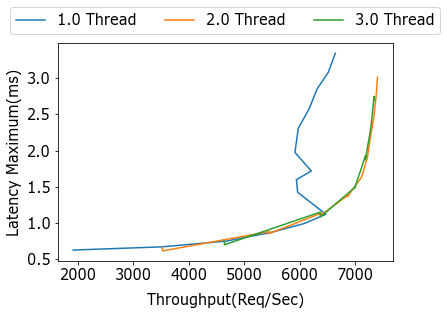

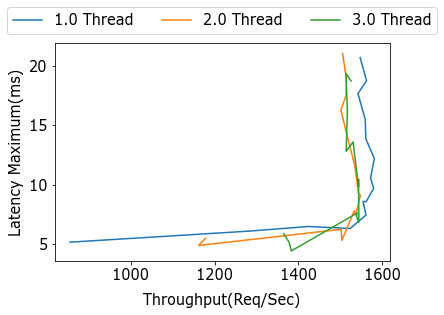

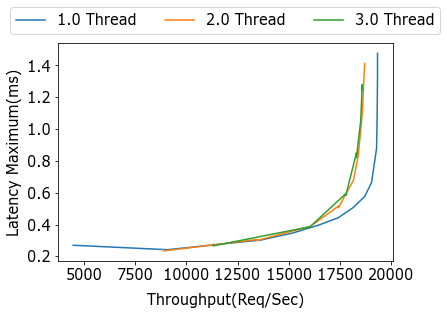

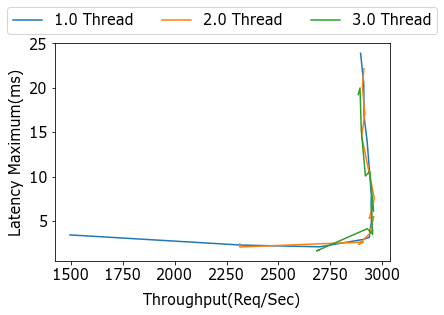

In [88]:
# run_times = [20,30,40,50]
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
plt.rcParams.update({"font.weight":"medium", "font.style":"normal", "font.family":"Verdana", "font.size":14.5})
# run_type = [file_list_secrets]
# graph_labels = ["List Secrets "]
run_times = [20]
# plt.rcParams.update({"font.weight":"medium", "font.style":"normal", "font.family":"serif"})
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i]%"basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        # df_tmp = df_list['lat_avg'].skew()
        # print(df_tmp)
        # based on skewness values we can detect outliers
        # df_list['lat_avg'].describe()
        # print(df_list['lat_avg'].quantile(0.10))
        # print(df_list['lat_avg'].quantile(0.90))
        # df_list["lat_avg"] = np.where(df_list["lat_avg"] <217.354, 217.354,df_list['lat_avg'])
        # df_list["lat_avg"] = np.where(df_list["lat_avg"] >801.414, 801.414,df_list['lat_avg'])
        # df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # df.groupby(['name', 'id',/ 'dept'])[
        # print(df_list_tc_request)
        # print(df_list_tc_request.count())
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        # plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.savefig("images/" + graph_labels[i], bbox_inches='tight')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        import matplotlib.font_manager as font_manager
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        # plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.savefig("images/SCONE " + graph_labels[i], bbox_inches='tight')
        plt.show()
        

In [ ]:
df_list_columns = pandas.read_csv(file_write_list % "scone").astype(dtype=float)
print(df_list_columns.columns)

In [ ]:
# run_times = [20,30,40,50]
run_type = [file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='scatter', x='throughput', y='lat_max', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='scatter', x='throughput', y='lat_max', label=str(key)+" Thread", marker='o')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul SCONE Mode)", ha='center')
        plt.show()

In [ ]:
# run_times = [20,30,40,50]
# run_type = [file_write_list,file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
# graph_labels = ["Write List ","List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_type = [file_write_random_secrets]
graph_labels = ["Write Random Secrets "]
run_times = [50]
x_axis = ['50per','90per','99per','99.99per']
import numpy as np
from scipy import stats
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['50per','90per','99per','9999per']):
            ax = grp.plot(ax=ax, kind='scatter',x='throughput', y='lat_max' )
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
        #     ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)', labelpad=5)
        plt.xlabel('Throughput(Req/Sec)', labelpad=10)
        plt.figtext(.5, -.1, graph_labels[i]+ "(Vault-Consul Native Mode)", ha='center')
        plt.show()